In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd

In [2]:
root = './distilled_dataset'

### CIFAR100 Distilled

In [3]:
class CIFAR100_Distilled(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, torch.tensor(label)

In [4]:
index_file = pd.read_csv('./CIFAR100_DM_index_files/ipc100_idx.csv')
index_file

,image_path,label
0,./CIFAR100_DM/ipc100/class0/00169883-da36-44ac...,0
1,./CIFAR100_DM/ipc100/class0/03979495-b927-4b32...,0
2,./CIFAR100_DM/ipc100/class0/06bbf568-f1cf-4b0e...,0
3,./CIFAR100_DM/ipc100/class0/09183e31-0bf4-4106...,0
4,./CIFAR100_DM/ipc100/class0/0a1dddd0-2ee6-4023...,0
...,...,...
9995,./CIFAR100_DM/ipc100/class99/f9820d24-1cb4-486...,99
9996,./CIFAR100_DM/ipc100/class99/fbf46794-ec4a-413...,99
9997,./CIFAR100_DM/ipc100/class99/fd2ebea7-390b-448...,99
9998,./CIFAR100_DM/ipc100/class99/fd655351-a9e2-45c...,99


In [5]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                transforms.Resize(128),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                              ])
cifar100_distilled_train = CIFAR100_Distilled(index_file, transform)

cifar100_root = '../cifar100'
cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(128),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                              ]))

In [6]:
batch_size = 64 
train_data_loader, test_data_loader = get_data_loaders(cifar100_distilled_train, cifar100_test, batch_size=batch_size)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [8]:
import os
model_name = 'resnet18'
dataset = 'cifar100_distilled'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
model = torchvision.models.resnet18(num_classes=100).to(device)

In [9]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 157/157 [00:28<00:00,  5.57it/s, loss=1.8] 


epoch: 1 done, loss: 0.043325867503881454
Acc: 0.0188
[0.001]


Epoch 2: 100%|██████████| 157/157 [00:27<00:00,  5.73it/s, loss=1.56]


epoch: 2 done, loss: 0.02720932476222515
Acc: 0.0511
[0.001]


Epoch 3: 100%|██████████| 157/157 [00:28<00:00,  5.58it/s, loss=1.06] 


epoch: 3 done, loss: 0.02124451845884323
Acc: 0.0448
[0.001]


Epoch 4: 100%|██████████| 157/157 [00:26<00:00,  5.88it/s, loss=1.18] 


epoch: 4 done, loss: 0.017219826579093933
Acc: 0.0574
[0.001]


Epoch 5: 100%|██████████| 157/157 [00:27<00:00,  5.63it/s, loss=0.495]


epoch: 5 done, loss: 0.014601222239434719
Acc: 0.0606
[0.001]


Epoch 6: 100%|██████████| 157/157 [00:26<00:00,  5.94it/s, loss=1.31] 


epoch: 6 done, loss: 0.012771179899573326
Acc: 0.0698
[0.001]


Epoch 7: 100%|██████████| 157/157 [00:25<00:00,  6.05it/s, loss=0.707]


epoch: 7 done, loss: 0.010982939973473549
Acc: 0.087
[0.001]


Epoch 8: 100%|██████████| 157/157 [00:26<00:00,  6.03it/s, loss=0.713]


epoch: 8 done, loss: 0.00940300989896059
Acc: 0.0915
[0.001]


Epoch 9: 100%|██████████| 157/157 [00:26<00:00,  5.89it/s, loss=0.806]


epoch: 9 done, loss: 0.008342118002474308
Acc: 0.0899
[0.001]


Epoch 10: 100%|██████████| 157/157 [00:26<00:00,  5.94it/s, loss=0.612]


epoch: 10 done, loss: 0.0070356521755456924
Acc: 0.0797
[0.001]


Epoch 11: 100%|██████████| 157/157 [00:26<00:00,  6.00it/s, loss=0.517]


epoch: 11 done, loss: 0.006123242899775505
Acc: 0.0706
[0.001]


Epoch 12: 100%|██████████| 157/157 [00:26<00:00,  6.03it/s, loss=0.889]


epoch: 12 done, loss: 0.00537067512050271
Acc: 0.0897
[0.001]


Epoch 13: 100%|██████████| 157/157 [00:26<00:00,  6.00it/s, loss=0.321]


epoch: 13 done, loss: 0.004683944396674633
Acc: 0.0914
[0.001]


Epoch 14: 100%|██████████| 157/157 [00:26<00:00,  5.97it/s, loss=0.257] 


epoch: 14 done, loss: 0.0038982604164630175
Acc: 0.0959
[0.001]


Epoch 15: 100%|██████████| 157/157 [00:26<00:00,  5.97it/s, loss=0.0633]


epoch: 15 done, loss: 0.0036609615199267864
Acc: 0.0737
[0.001]


Epoch 16: 100%|██████████| 157/157 [00:26<00:00,  5.90it/s, loss=0.869] 


epoch: 16 done, loss: 0.0032959056552499533
Acc: 0.1013
[0.001]


Epoch 17: 100%|██████████| 157/157 [00:26<00:00,  6.00it/s, loss=0.149] 


epoch: 17 done, loss: 0.0030671528074890375
Acc: 0.0765
[0.001]


Epoch 18: 100%|██████████| 157/157 [00:26<00:00,  5.84it/s, loss=0.0658]


epoch: 18 done, loss: 0.002455890877172351
Acc: 0.0823
[0.001]


Epoch 19: 100%|██████████| 157/157 [00:26<00:00,  5.96it/s, loss=0.304] 


epoch: 19 done, loss: 0.001959959976375103
Acc: 0.105
[0.001]


Epoch 20: 100%|██████████| 157/157 [00:26<00:00,  5.91it/s, loss=0.236] 


epoch: 20 done, loss: 0.0021880948916077614
Acc: 0.104
[0.001]


Epoch 21: 100%|██████████| 157/157 [00:26<00:00,  6.03it/s, loss=0.553] 


epoch: 21 done, loss: 0.0019937758333981037
Acc: 0.0756
[0.001]


Epoch 22: 100%|██████████| 157/157 [00:26<00:00,  5.91it/s, loss=0.545] 


epoch: 22 done, loss: 0.0023319798056036234
Acc: 0.0722
[0.001]


Epoch 23: 100%|██████████| 157/157 [00:26<00:00,  5.99it/s, loss=0.164] 


epoch: 23 done, loss: 0.002315043704584241
Acc: 0.113
[0.0001]


Epoch 24: 100%|██████████| 157/157 [00:26<00:00,  5.97it/s, loss=0.0398]


epoch: 24 done, loss: 0.0007905017700977623
Acc: 0.1022
[0.0001]


Epoch 25: 100%|██████████| 157/157 [00:26<00:00,  6.01it/s, loss=0.0123] 


epoch: 25 done, loss: 0.00047900923527777195
Acc: 0.1056
[0.0001]


Epoch 26: 100%|██████████| 157/157 [00:26<00:00,  5.97it/s, loss=0.0178] 


epoch: 26 done, loss: 0.00039263430517166853
Acc: 0.1062
[0.0001]


Epoch 27: 100%|██████████| 157/157 [00:26<00:00,  5.96it/s, loss=0.0263] 


epoch: 27 done, loss: 0.0003714999184012413
Acc: 0.1046
[0.0001]


Epoch 28: 100%|██████████| 157/157 [00:26<00:00,  6.04it/s, loss=0.00567]


epoch: 28 done, loss: 0.00033731249277479947
Acc: 0.1102
[0.0001]


Epoch 29: 100%|██████████| 157/157 [00:25<00:00,  6.10it/s, loss=0.0164] 


epoch: 29 done, loss: 0.00030651685665361583
Acc: 0.109
[0.0001]


Epoch 30: 100%|██████████| 157/157 [00:25<00:00,  6.05it/s, loss=0.255]  


epoch: 30 done, loss: 0.00029319862369447947
Acc: 0.1033
[0.0001]


Epoch 31: 100%|██████████| 157/157 [00:26<00:00,  5.86it/s, loss=0.0156] 


epoch: 31 done, loss: 0.000288619427010417
Acc: 0.106
[0.0001]


Epoch 32: 100%|██████████| 157/157 [00:25<00:00,  6.14it/s, loss=0.052]  


epoch: 32 done, loss: 0.0002555472601670772
Acc: 0.1039
[0.0001]


Epoch 33: 100%|██████████| 157/157 [00:25<00:00,  6.24it/s, loss=0.00672]


epoch: 33 done, loss: 0.00023764418438076973
Acc: 0.1033
[0.0001]


Epoch 34: 100%|██████████| 157/157 [00:26<00:00,  6.03it/s, loss=0.00994]


epoch: 34 done, loss: 0.00022782337327953428
Acc: 0.1056
[0.0001]


Epoch 35: 100%|██████████| 157/157 [00:26<00:00,  6.01it/s, loss=0.00811]


epoch: 35 done, loss: 0.00020880061492789537
Acc: 0.1055
[0.0001]


Epoch 36: 100%|██████████| 157/157 [00:26<00:00,  5.95it/s, loss=0.0162] 


epoch: 36 done, loss: 0.0002107773907482624
Acc: 0.1005
[0.0001]


Epoch 37: 100%|██████████| 157/157 [00:26<00:00,  5.96it/s, loss=0.0153] 


epoch: 37 done, loss: 0.00020420226792339236
Acc: 0.1061
[0.0001]


Epoch 38: 100%|██████████| 157/157 [00:26<00:00,  5.93it/s, loss=0.0106] 


epoch: 38 done, loss: 0.00019380009325686842
Acc: 0.104
[0.0001]


Epoch 39: 100%|██████████| 157/157 [00:26<00:00,  6.00it/s, loss=0.0164] 


epoch: 39 done, loss: 0.00018970902601722628
Acc: 0.1097
[0.0001]


Epoch 40: 100%|██████████| 157/157 [00:26<00:00,  6.00it/s, loss=0.0114] 


epoch: 40 done, loss: 0.00017599073180463165
Acc: 0.1086
[0.0001]


Epoch 41: 100%|██████████| 157/157 [00:26<00:00,  5.99it/s, loss=0.00721]


epoch: 41 done, loss: 0.00018471668590791523
Acc: 0.1121
[0.0001]


Epoch 42: 100%|██████████| 157/157 [00:26<00:00,  6.02it/s, loss=0.0326] 


epoch: 42 done, loss: 0.0001695967512205243
Acc: 0.1081
[0.0001]


Epoch 43: 100%|██████████| 157/157 [00:24<00:00,  6.37it/s, loss=0.00467]


epoch: 43 done, loss: 0.00018168163660448045
Acc: 0.1076
[0.0001]


Epoch 44: 100%|██████████| 157/157 [00:25<00:00,  6.25it/s, loss=0.0584] 


epoch: 44 done, loss: 0.00016473270079586655
Acc: 0.1146
[0.0001]


Epoch 45: 100%|██████████| 157/157 [00:25<00:00,  6.24it/s, loss=0.00406]


epoch: 45 done, loss: 0.00016698181570973247
Acc: 0.1039
[0.0001]


Epoch 46: 100%|██████████| 157/157 [00:25<00:00,  6.24it/s, loss=0.00891] 


epoch: 46 done, loss: 0.0001430735719623044
Acc: 0.1087
[0.0001]


Epoch 47: 100%|██████████| 157/157 [00:25<00:00,  6.23it/s, loss=0.00225]


epoch: 47 done, loss: 0.000142923672683537
Acc: 0.1097
[0.0001]


Epoch 48: 100%|██████████| 157/157 [00:25<00:00,  6.22it/s, loss=0.0292]  


epoch: 48 done, loss: 0.00014268355153035372
Acc: 0.1107
[0.0001]


Epoch 49: 100%|██████████| 157/157 [00:25<00:00,  6.20it/s, loss=0.012]  


epoch: 49 done, loss: 0.0001431023410987109
Acc: 0.1026
[0.0001]


Epoch 50: 100%|██████████| 157/157 [00:24<00:00,  6.32it/s, loss=0.0471]  


epoch: 50 done, loss: 0.0001374141575070098
Acc: 0.1071
[0.0001]


Epoch 51: 100%|██████████| 157/157 [00:23<00:00,  6.54it/s, loss=0.0137]  


epoch: 51 done, loss: 0.00013779052824247628
Acc: 0.1032
[0.0001]


Epoch 52: 100%|██████████| 157/157 [00:23<00:00,  6.65it/s, loss=0.00355]


epoch: 52 done, loss: 0.0001331085222773254
Acc: 0.1097
[0.0001]


Epoch 53: 100%|██████████| 157/157 [00:23<00:00,  6.62it/s, loss=0.00222] 


epoch: 53 done, loss: 0.00015007759793661535
Acc: 0.1037
[0.0001]


Epoch 54: 100%|██████████| 157/157 [00:23<00:00,  6.63it/s, loss=0.00545] 


epoch: 54 done, loss: 0.00012295477790758014
Acc: 0.1019
[0.0001]


Epoch 55: 100%|██████████| 157/157 [00:24<00:00,  6.49it/s, loss=0.00816] 


epoch: 55 done, loss: 0.00015056499978527427
Acc: 0.1043
[0.0001]


Epoch 56: 100%|██████████| 157/157 [00:24<00:00,  6.37it/s, loss=0.0105]  


epoch: 56 done, loss: 0.00015038563287816942
Acc: 0.1085
[0.0001]


Epoch 57: 100%|██████████| 157/157 [00:24<00:00,  6.45it/s, loss=0.00524] 


epoch: 57 done, loss: 0.00014776267926208675
Acc: 0.1046
[0.0001]


Epoch 58: 100%|██████████| 157/157 [00:22<00:00,  6.94it/s, loss=0.0115]  


epoch: 58 done, loss: 0.0001253880764124915
Acc: 0.1091
[1e-05]


Epoch 59: 100%|██████████| 157/157 [00:22<00:00,  7.14it/s, loss=0.0035]  


epoch: 59 done, loss: 0.00010061537614092231
Acc: 0.108
[1e-05]


Epoch 60: 100%|██████████| 157/157 [00:21<00:00,  7.20it/s, loss=0.00196] 


epoch: 60 done, loss: 9.912953100865707e-05
Acc: 0.1048
[1e-05]


Epoch 61: 100%|██████████| 157/157 [00:21<00:00,  7.20it/s, loss=0.012]   


epoch: 61 done, loss: 9.79351534624584e-05
Acc: 0.1104
[1e-05]


Epoch 62: 100%|██████████| 157/157 [00:21<00:00,  7.27it/s, loss=0.0039]  


epoch: 62 done, loss: 9.747139120008796e-05
Acc: 0.106
[1e-05]


Epoch 63: 100%|██████████| 157/157 [00:22<00:00,  7.13it/s, loss=0.0247]  


epoch: 63 done, loss: 0.00010111585288541391
Acc: 0.1069
[1e-05]


Epoch 64: 100%|██████████| 157/157 [00:20<00:00,  7.66it/s, loss=0.000985]


epoch: 64 done, loss: 9.335376671515405e-05
Acc: 0.1097
[1e-05]


Epoch 65: 100%|██████████| 157/157 [00:20<00:00,  7.78it/s, loss=0.00506] 


epoch: 65 done, loss: 9.347748709842563e-05
Acc: 0.1051
[1e-05]


Epoch 66: 100%|██████████| 157/157 [00:20<00:00,  7.74it/s, loss=0.00721] 


epoch: 66 done, loss: 9.493997640674934e-05
Acc: 0.1085
[1e-05]


Epoch 67: 100%|██████████| 157/157 [00:21<00:00,  7.40it/s, loss=0.0482]  


epoch: 67 done, loss: 9.618048352422193e-05
Acc: 0.1097
[1e-05]


Epoch 68: 100%|██████████| 157/157 [00:21<00:00,  7.21it/s, loss=0.0249]  


epoch: 68 done, loss: 9.601556666893885e-05
Acc: 0.107
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 157/157 [00:21<00:00,  7.35it/s, loss=0.00363] 


epoch: 69 done, loss: 8.926583541324362e-05
Acc: 0.1067
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 157/157 [00:19<00:00,  7.92it/s, loss=0.00604] 


epoch: 70 done, loss: 9.007894550450146e-05
Acc: 0.1069
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 157/157 [00:19<00:00,  7.94it/s, loss=0.000847]


epoch: 71 done, loss: 9.152929851552472e-05
Acc: 0.1117
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 157/157 [00:19<00:00,  8.01it/s, loss=0.00146] 


epoch: 72 done, loss: 8.690707181813195e-05
Acc: 0.1074
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 157/157 [00:19<00:00,  8.02it/s, loss=0.00649] 


epoch: 73 done, loss: 9.058617433765903e-05
Acc: 0.1079
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 157/157 [00:19<00:00,  8.06it/s, loss=0.00476] 


epoch: 74 done, loss: 8.908806194085628e-05
Acc: 0.1098
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 157/157 [00:19<00:00,  7.97it/s, loss=0.048]   


epoch: 75 done, loss: 9.586296800989658e-05
Acc: 0.1101
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 157/157 [00:19<00:00,  7.95it/s, loss=0.00305] 


epoch: 76 done, loss: 8.74334218678996e-05
Acc: 0.1078
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 157/157 [00:19<00:00,  7.95it/s, loss=0.00476] 


epoch: 77 done, loss: 9.011435759020969e-05
Acc: 0.1064
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 157/157 [00:19<00:00,  8.01it/s, loss=0.0566]  


epoch: 78 done, loss: 9.511300595477223e-05
Acc: 0.1089
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 157/157 [00:19<00:00,  7.86it/s, loss=0.00298] 


epoch: 79 done, loss: 8.846606215229258e-05
Acc: 0.1104
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 157/157 [00:19<00:00,  8.04it/s, loss=0.0238]  


epoch: 80 done, loss: 9.113738633459434e-05
Acc: 0.1055
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 157/157 [00:19<00:00,  8.08it/s, loss=0.00197] 


epoch: 81 done, loss: 9.153389692073688e-05
Acc: 0.1102
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 157/157 [00:19<00:00,  8.07it/s, loss=0.00155] 


epoch: 82 done, loss: 9.026827319758013e-05
Acc: 0.1103
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 157/157 [00:19<00:00,  7.99it/s, loss=0.0345]  


epoch: 83 done, loss: 9.234871686203405e-05
Acc: 0.1115
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 157/157 [00:19<00:00,  7.99it/s, loss=0.0157]  


epoch: 84 done, loss: 9.177228639600798e-05
Acc: 0.1064
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 157/157 [00:19<00:00,  7.96it/s, loss=0.0763]  


epoch: 85 done, loss: 9.47741573327221e-05
Acc: 0.1081
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 157/157 [00:19<00:00,  8.02it/s, loss=0.00231] 


epoch: 86 done, loss: 8.503727440256625e-05
Acc: 0.1055
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 157/157 [00:19<00:00,  8.02it/s, loss=0.0134]  


epoch: 87 done, loss: 8.948728645918891e-05
Acc: 0.1107
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 157/157 [00:19<00:00,  8.04it/s, loss=0.0227]  


epoch: 88 done, loss: 9.177467291010544e-05
Acc: 0.1095
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 157/157 [00:19<00:00,  8.02it/s, loss=0.00654] 


epoch: 89 done, loss: 9.06879868125543e-05
Acc: 0.1081
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 157/157 [00:20<00:00,  7.83it/s, loss=0.0271]  


epoch: 90 done, loss: 9.12474060896784e-05
Acc: 0.1057
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 157/157 [00:20<00:00,  7.80it/s, loss=0.0502]  


epoch: 91 done, loss: 9.61918558459729e-05
Acc: 0.1086
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 157/157 [00:20<00:00,  7.76it/s, loss=0.0195]  


epoch: 92 done, loss: 9.180622146232054e-05
Acc: 0.1096
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 157/157 [00:20<00:00,  7.78it/s, loss=0.00624] 


epoch: 93 done, loss: 8.758936019148678e-05
Acc: 0.1085
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 157/157 [00:20<00:00,  7.78it/s, loss=0.00486] 


epoch: 94 done, loss: 9.037558629643172e-05
Acc: 0.1087
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 157/157 [00:20<00:00,  7.78it/s, loss=0.0824]  


epoch: 95 done, loss: 9.638129267841578e-05
Acc: 0.1043
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 157/157 [00:20<00:00,  7.68it/s, loss=0.00186] 


epoch: 96 done, loss: 9.035055700223893e-05
Acc: 0.1075
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 157/157 [00:19<00:00,  7.89it/s, loss=0.0014]  


epoch: 97 done, loss: 9.019566641654819e-05
Acc: 0.1079
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 157/157 [00:20<00:00,  7.74it/s, loss=0.0555]  


epoch: 98 done, loss: 9.429732017451897e-05
Acc: 0.1099
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 157/157 [00:20<00:00,  7.70it/s, loss=0.00214] 


epoch: 99 done, loss: 8.824408723739907e-05
Acc: 0.1049
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 157/157 [00:20<00:00,  7.75it/s, loss=0.0215]  


epoch: 100 done, loss: 9.11658353288658e-05
Acc: 0.1073
[1.0000000000000002e-06]
Time taken: 3570.218548 seconds


In [10]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.1146, tensor(0.1409, device='cuda:0'))

<AxesSubplot: >

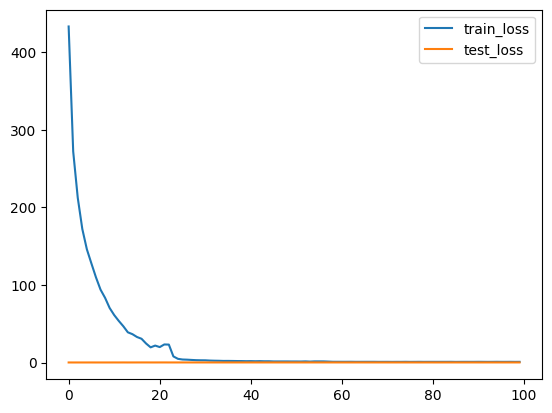

In [11]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])